## Import Library

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score # Import Accuracy metrics
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
%matplotlib inline

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 16,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)

In [29]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Drop `ID` column

In [31]:
df.drop(['Id'], axis=1, inplace=True)

### Exploratory Data Analysis

In [32]:
df.shape

(150, 5)

In [33]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### Check Missing Values

In [35]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Data Visualization on Target Column

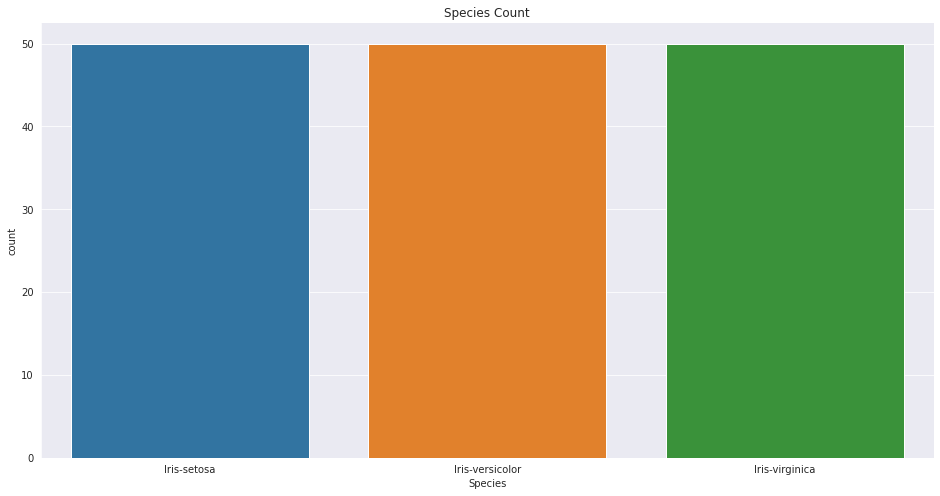

In [37]:
plt.title('Species Count')
sns.countplot(df['Species'])

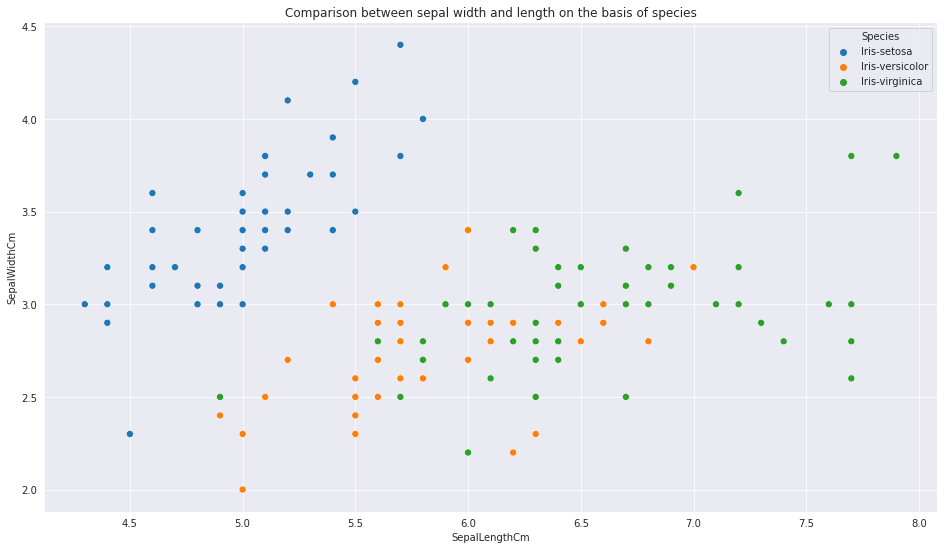

In [12]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species'], s= 50);

In [39]:
df[['SepalLengthCm','SepalWidthCm']]

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


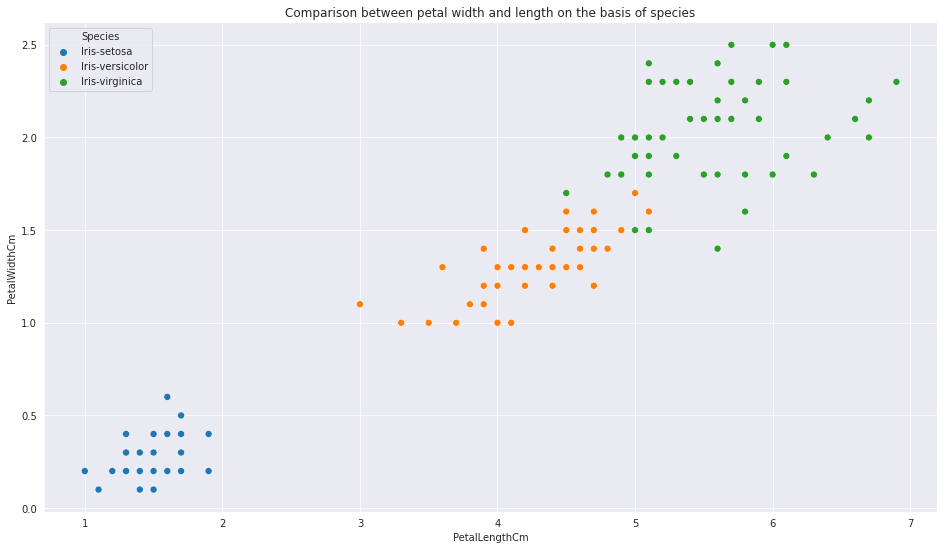

In [13]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'], hue = df['Species'], s= 50);

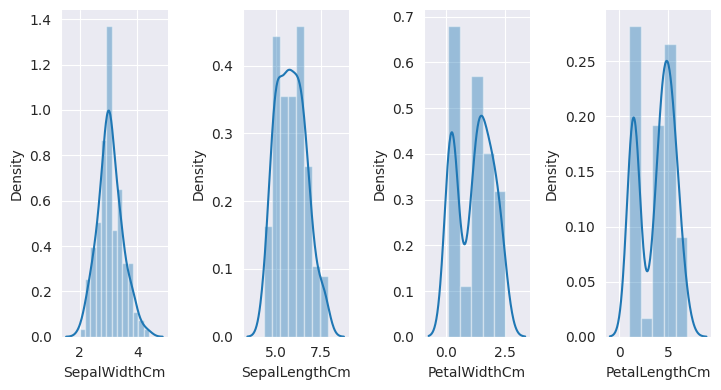

In [40]:
COLS = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in COLS:
    plt.subplot(1,11,i)
    sns.distplot(df[col])
    i = i+1
plt.tight_layout()
plt.show()

### Data Preparation

In [15]:
X = df.drop(['Species'], axis=1) # nanti dijelasin maksudnya apa, dikasih alternatif penulisan lain
# X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
150 * (70 / 100)

105.0

In [42]:
150 * (30 / 100)

45.0

In [44]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [45]:
X_train.shape

(105, 4)

In [47]:
y_train.head()

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object

In [48]:
X_test.shape

(45, 4)

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


In [19]:
!pip install graphviz pydotplus

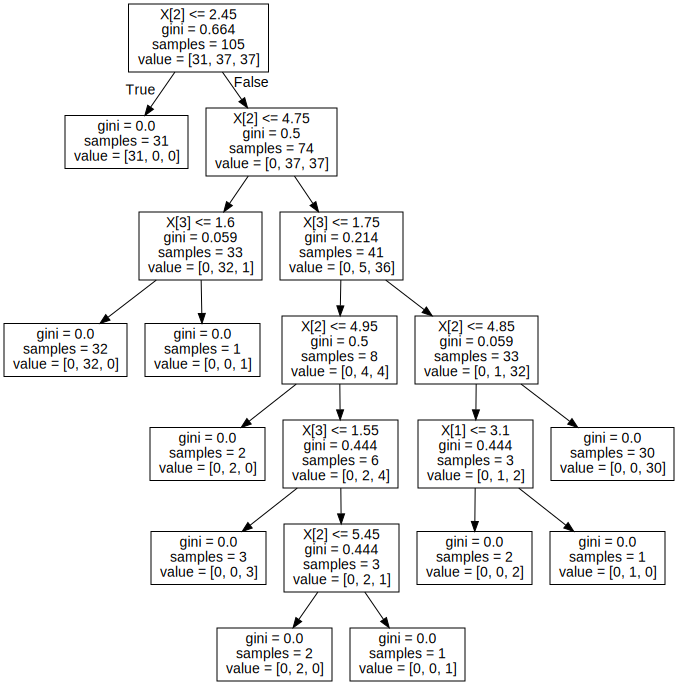

In [51]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

### Modeling but we add some new features

In [52]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df['Sepal_diff'] = df['SepalLengthCm']-df['SepalWidthCm']
df['petal_diff'] = df['PetalLengthCm']-df['PetalWidthCm']

In [54]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2


In [55]:
df['Sepal_petal_len_diff'] = df['SepalLengthCm']-df['PetalLengthCm']
df['Sepal_petal_width_diff'] = df['SepalWidthCm']-df['PetalWidthCm']

In [56]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4


In [57]:
df.shape

(150, 9)

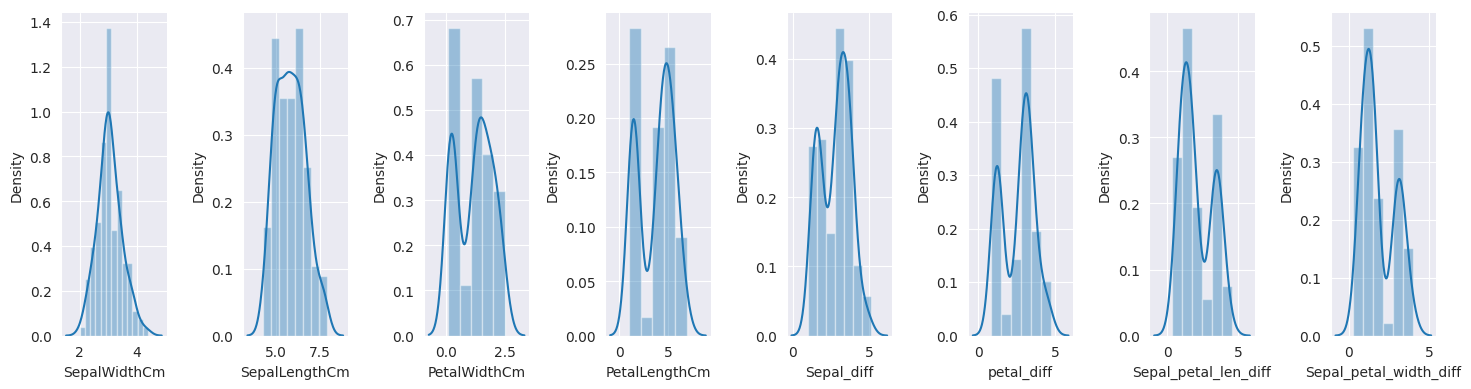

In [58]:
COLS = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm',
        'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',
        'Sepal_petal_width_diff']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in COLS:
    plt.subplot(1,11,i)
    sns.distplot(df[col])
    i = i+1
plt.tight_layout()
plt.show()

In [59]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [60]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,5.1,3.5,1.4,0.2,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,1.4,1.2,3.6,3.4


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
X_train.shape

(105, 8)

In [64]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = clf2.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf2.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


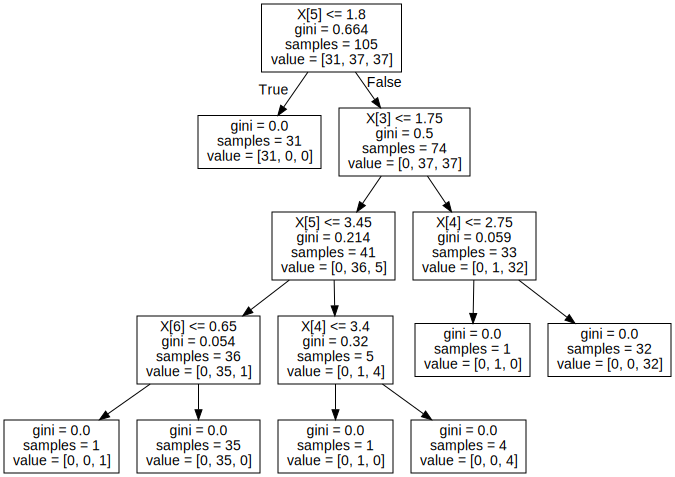

In [66]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf2, out_file=None)

graph = graphviz.Source(dot_data)
graph